# Dohtem E-commerce Personalization Strategy #

Setup and Imports

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import pickle
import json
import os

Configure Plotting

In [22]:
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')
warnings.filterwarnings('ignore')

Set random seed for reproducibility

In [23]:
np.random.seed(42)
print("Libraries imported successfully!"),
print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Libraries imported successfully!
Analysis Date: 2025-09-05 21:36:06


Custom Modules

In [24]:
from data_processor import DohtemDataProcessor
from customer_segmentation import CustomerSegmentation
from churn_prediction import ChurnPredictor
from personalization_engine import PersonalizationEngine
from business_impact import BusinessImpactCalculator
from visualization_utils import create_comprehensive_visualizations

Step 1: Data Loading and Exploration

In [25]:
data_processor = DohtemDataProcessor('dohtem_ecommerce_customers.csv')
raw_data = data_processor.load_data()

Data loaded successfully!
Dataset shape: (5630, 20)
Columns: ['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


Display Basic Information

In [26]:
print(f"Dataset Shape: {raw_data.shape}"),
print(f" Target Variable Distribution:"),
print(raw_data['Churn'].value_counts(normalize=True).round(3)),
print(f"First few rows: {display(raw_data.head())}")

Dataset Shape: (5630, 20)
 Target Variable Distribution:
Churn
0    0.832
1    0.168
Name: proportion, dtype: float64


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


First few rows: None


Comprehensive data exploration


COMPREHENSIVE DATA EXPLORATION

1. DATASET OVERVIEW:
Rows: 5,630
Columns: 20
Memory usage: 2.40 MB

2. DATA TYPES:
   int64: 8 columns
   float64: 7 columns
   object: 5 columns

3. MISSING VALUES ANALYSIS:
Features with missing values:
      DaySinceLastOrder: 307.0 (5.5%)
      OrderAmountHikeFromlastYear: 265.0 (4.7%)
      Tenure: 264.0 (4.7%)
      OrderCount: 258.0 (4.6%)
      CouponUsed: 256.0 (4.5%)
      HourSpendOnApp: 255.0 (4.5%)
      WarehouseToHome: 251.0 (4.5%)

4. TARGET VARIABLE ANALYSIS (CHURN):
   No Churn (0): 4,682 customers (83.2%)
   Churned (1): 948 customers (16.8%)

5. CATEGORICAL VARIABLES:
   PreferredLoginDevice: 3 unique values
      Top values: {'Mobile Phone': 2765, 'Computer': 1634, 'Phone': 1231}
   PreferredPaymentMode: 7 unique values
      Top values: {'Debit Card': 2314, 'Credit Card': 1501, 'E wallet': 614}
   Gender: 2 unique values
      Top values: {'Male': 3384, 'Female': 2246}
   PreferedOrderCat: 6 unique values
      Top values: {'Laptop

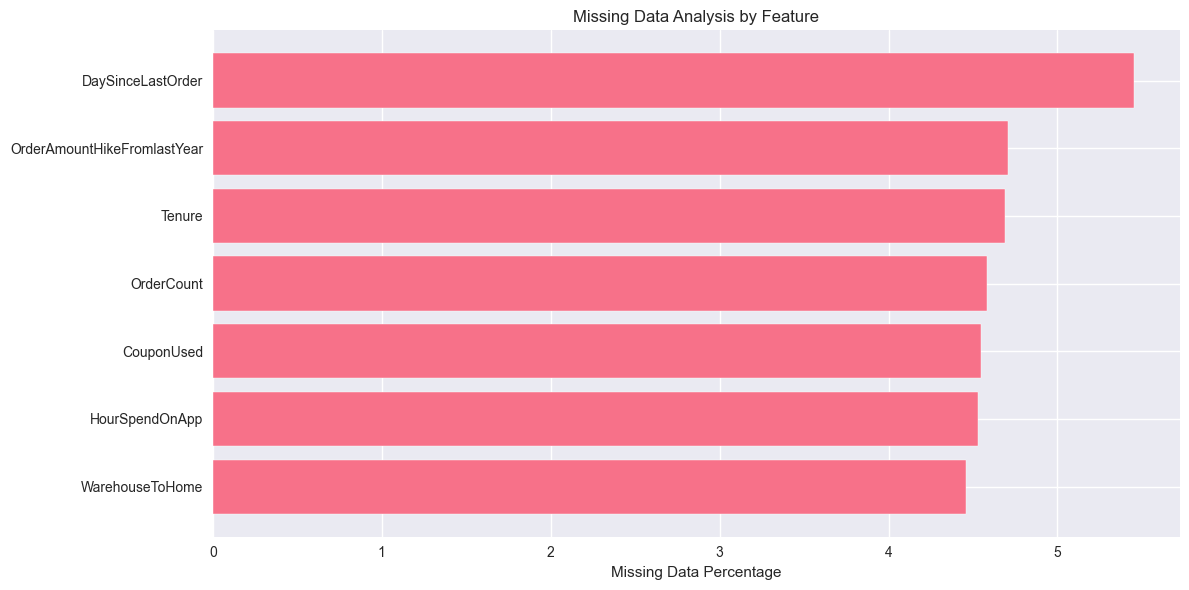

In [27]:
missing_analysis = data_processor.explore_data()
# Visualize missing data if any exists
plt.figure(figsize=(12, 6))
missing_data = missing_analysis[missing_analysis['Missing_Count'] > 0].sort_values('Missing_Percent')

if not missing_data.empty:
    plt.barh(missing_data.index, missing_data['Missing_Percent'])
    plt.xlabel('Missing Data Percentage')
    plt.title('Missing Data Analysis by Feature')
    plt.tight_layout()
    plt.show()
else:
    print("No missing data")

Step 2: Data Preprocessing

In [28]:
# Process the data
processed_data = data_processor.preprocess_data()
print("Data preprocessing completed!")
print(f"New features created: {processed_data.shape[1] - raw_data.shape[1]}")

# Show the engineered features
new_features = ['CustomerValueScore', 'EngagementScore', 'HighRiskCategory','HighRiskPayment', 'LowSatisfaction']
print("New Engineer Features:")
for feature in new_features:
    if feature in processed_data.columns:
         print(f"{feature}: Mean = {processed_data[feature].mean():.2f}, Std = {processed_data[feature].std():.2f}")

 # Display processed data samples
display(processed_data[['CustomerID', 'Churn'] + new_features].head())


DATA PREPROCESSING & FEATURE ENGINEERING

1. HANDLING MISSING VALUES:
Tenure: Filled 264 missing values with median (9.00)
WarehouseToHome: Filled 251 missing values with median (14.00)
HourSpendOnApp: Filled 255 missing values with median (3.00)
OrderAmountHikeFromlastYear: Filled 265 missing values with median (15.00)
CouponUsed: Filled 256 missing values with median (1.00)
OrderCount: Filled 258 missing values with median (2.00)
DaySinceLastOrder: Filled 307 missing values with median (3.00)

2. FEATURE ENGINEERING:
CustomerValueScore created (mean: 1.36)
EngagementScore created (mean: 5.35)
Risk indicators created: HighRiskCategory, HighRiskPayment, LowSatisfaction
Behavioral & loyalty features created
Service quality & logistics features created

3. ENCODING CATEGORICAL VARIABLES:
PreferredLoginDevice: 3 unique values encoded
PreferredPaymentMode: 7 unique values encoded
Gender: 2 unique values encoded
PreferedOrderCat: 6 unique values encoded
MaritalStatus: 3 unique values encod

,CustomerID,Churn,CustomerValueScore,EngagementScore,HighRiskCategory,HighRiskPayment,LowSatisfaction
0,50001,1,0.660,4.6,0,0,1
1,50002,1,0.721,5.3,1,0,0
2,50003,1,0.520,4.6,1,0,0
3,50004,1,0.734,4.6,0,0,0
4,50005,1,0.930,4.8,1,0,0


Step 3: Customer Segmentation - Use K-Means clustering to identify distinct customer segments

In [29]:
# Initialize segmentation model
segmentation = CustomerSegmentation(n_clusters=5)
segmented_data = segmentation.fit_segments(processed_data.copy())

# Create models directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save segmentation mode
segmentation.save_model('models/customer_segmentation_model.pkl')
print(f"{segmentation.n_clusters} customer segments identified")
print("Customer Segmentation model saved to: models/customer_segmentation_model.pkl")


👥 FITTING CUSTOMER SEGMENTATION MODEL
Preparing features for customer segmentation...
Selected 15 features for segmentation:
 1. Tenure
 2. HourSpendOnApp
 3. NumberOfDeviceRegistered
 4. SatisfactionScore
 5. NumberOfAddress
 6. OrderCount
 7. CashbackAmount
 8. CustomerValueScore
 9. EngagementScore
10. WarehouseToHome
11. OrderAmountHikeFromlastYear
12. CouponUsed
13. OrderFrequency
14. CashbackEfficiency
15. ServiceQualityScore

 Training K-Means with 5 clusters...
 Segmentation completed!
   Silhouette Score: 0.123
   Calinski-Harabasz Score: 819
   Inertia: 53363

 CREATING DETAILED SEGMENT PROFILES

  Segment 0 - Engaged Grocery Customers
    Size: 659 customers (11.7%)
    Churn Rate: 3.0%
    Satisfaction: 3.0/5
    Avg Orders: 2.2
    Value Score: 1.20
    Top Category: Grocery
    Risk Level: Low

  Segment 1 - Engaged Mobile Phone Customers
    Size: 1,535 customers (27.3%)
    Churn Rate: 22.0%
    Satisfaction: 3.9/5
    Avg Orders: 2.6
    Value Score: 1.42
    Top Cate

Visualize customer segments

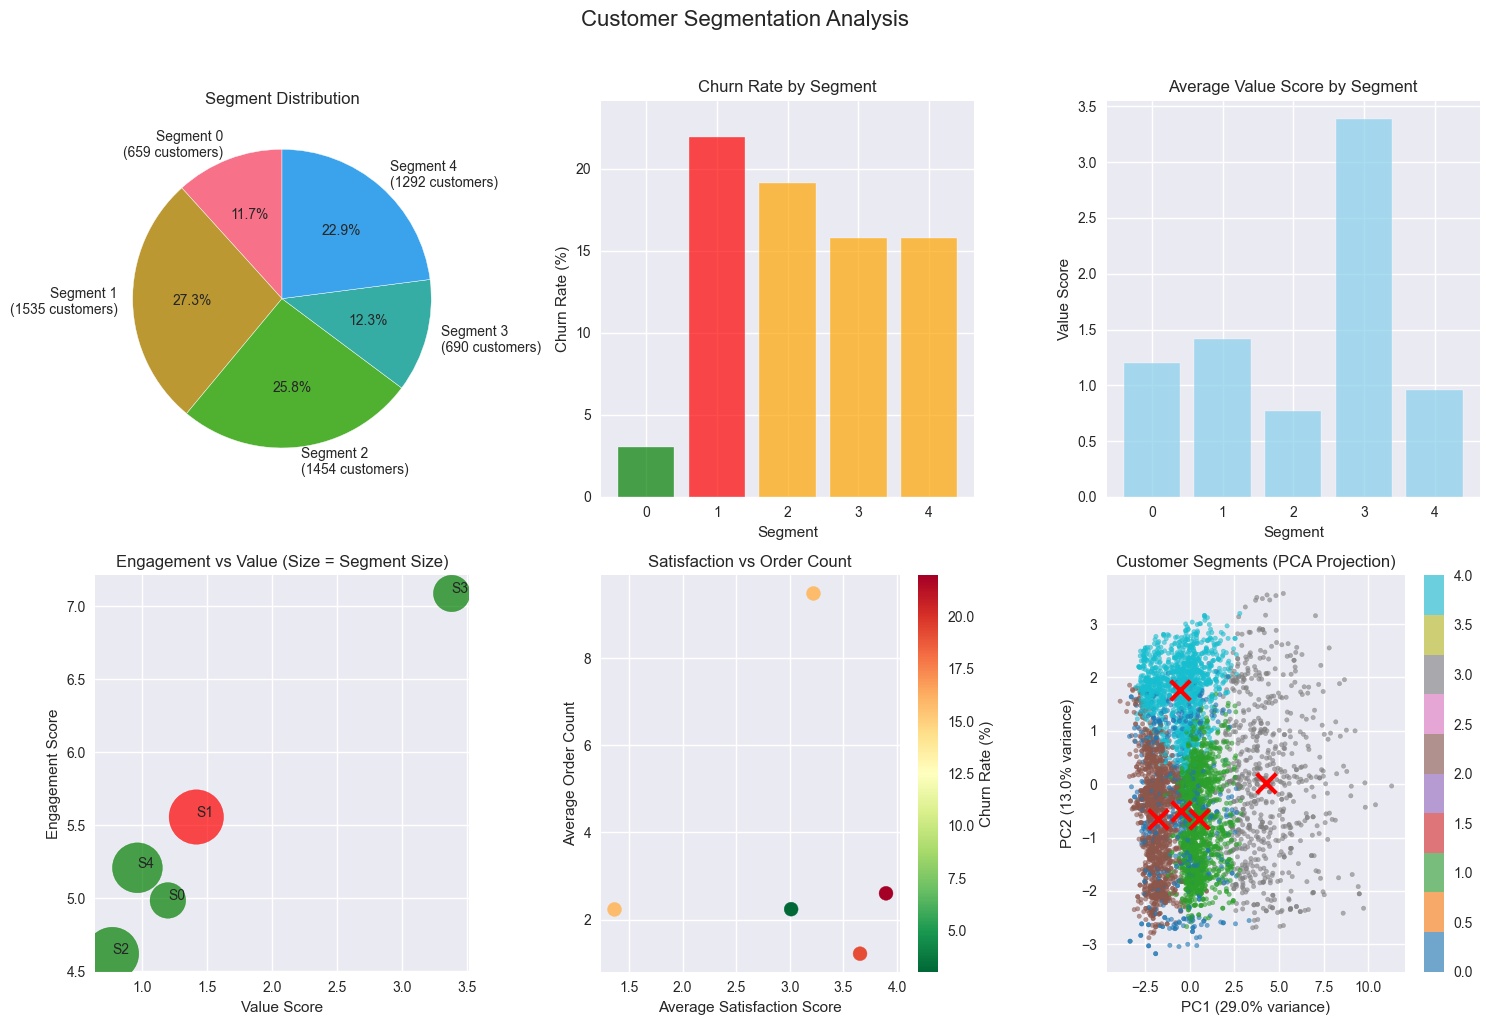

Customer Segmentation Summary:


,Segment,Description,Size,Percentage,Churn_Rate,Risk_Level,Value_Tier,Engagement,Avg_Orders,Avg_Satisfaction,Top_Category,Value_Score
0,0,Engaged Grocery Customers,659,11.7%,3.0%,Low,Standard,High,2.2,3.0,Grocery,1.20
1,1,Engaged Mobile Phone Customers,1535,27.3%,22.0%,Medium,Standard,High,2.6,3.9,Mobile Phone,1.42
2,2,Basic Laptop & Accessory Customers,1454,25.8%,19.1%,Medium,Basic,High,1.2,3.7,Laptop & Accessory,0.77
3,3,Premium Laptop & Accessory Customers,690,12.3%,15.8%,Medium,Premium,High,9.5,3.2,Laptop & Accessory,3.38
4,4,Basic Laptop & Accessory Customers,1292,22.9%,15.8%,Medium,Basic,High,2.2,1.4,Laptop & Accessory,0.96


In [30]:
fig = segmentation.plot_segments(figsize=(15, 10))
plt.suptitle('Customer Segmentation Analysis', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Display segment profiles
segment_summary = segmentation.get_segment_summary()
print(f"Customer Segmentation Summary:")
display(segment_summary)

Step 4: Churn Prediction Model

In [31]:
# Initialize churn predictor
churn_predictor = ChurnPredictor()
print("Training Churn Prediction Model...")
churn_model_results = churn_predictor.train_model(segmented_data)

# Save the trained model
churn_predictor.save_model('models/churn_prediction_model.pkl')
print("Churn Prediction Model training completed!")
print(f"Model AUC Score: {churn_model_results['test_auc']:.4f}")
print("Churn Prediction Model saved to: models/churn_prediction_model.pkl")

Training Churn Prediction Model...

TRAINING CHURN PREDICTION MODEL (RANDOM_FOREST)
🔍 Preparing features for churn prediction...
Prepared 28 features for modeling:
Base features: 13
Engineered features: 9
Categorical features: 5
Target distribution: {0: 4682, 1: 948}

 Data Split:
   Training set: 4,504 samples
   Test set: 1,126 samples
   Features: 28
   Train churn rate: 0.168
   Test churn rate: 0.169

 Hyperparameter tuning with 5-fold cross-validation...
 Best parameters found:
   class_weight: balanced
   max_depth: None
   min_samples_leaf: 1
   min_samples_split: 2
   n_estimators: 200
   Best CV score: 0.9747

 Evaluating model on test set...
   Model Performance Summary:
   AUC Score: 0.9986
   F1 Score: 0.9396
   Precision: 0.9828
   Recall: 0.9000
 Good generalization (AUC difference: 0.0014)

 Top 10 Most Important Features:
    1. Tenure: 0.1845
    2. OrderFrequency: 0.1114
    3. CashbackAmount: 0.0669
    4. Complain: 0.0540
    5. CashbackEfficiency: 0.0498
    6. Da

Visualize model performance

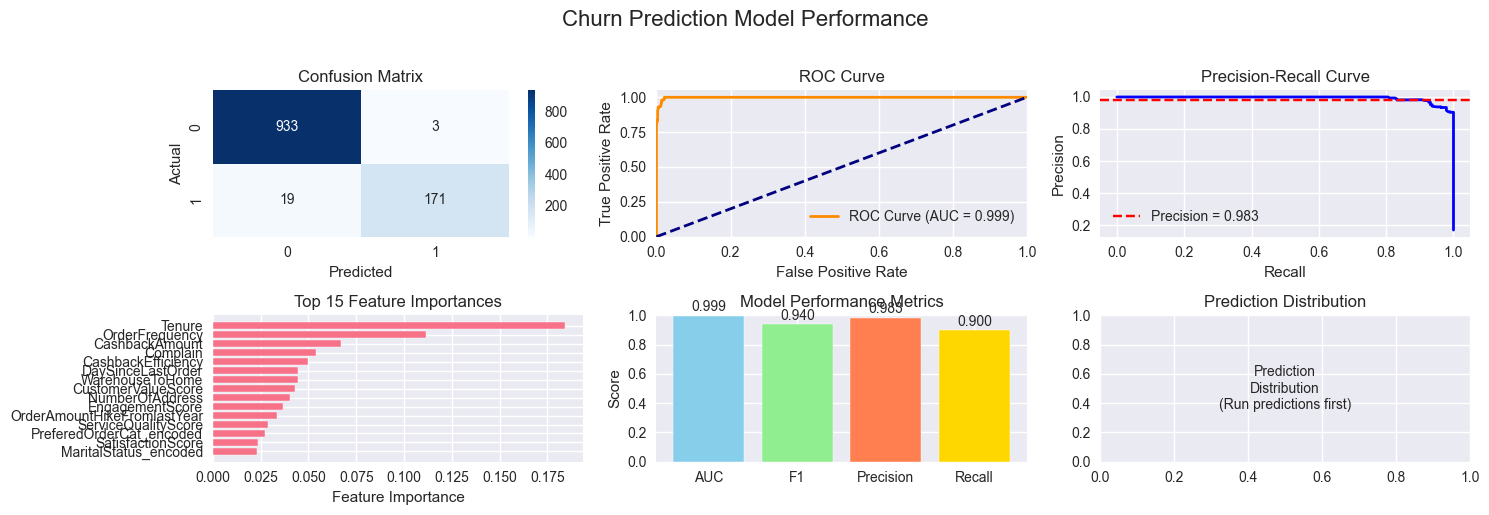

Top 10 Most Important Features for Churn Prediction:


,feature,importance
0,Tenure,0.184479
18,OrderFrequency,0.111353
12,CashbackAmount,0.066854
7,Complain,0.053969
19,CashbackEfficiency,0.049751
11,DaySinceLastOrder,0.044688
2,WarehouseToHome,0.044542
13,CustomerValueScore,0.043237
6,NumberOfAddress,0.040378
14,EngagementScore,0.036558


In [32]:
fig = churn_predictor.plot_model_performance(figsize=(15, 5))
plt.suptitle('Churn Prediction Model Performance', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

print("Top 10 Most Important Features for Churn Prediction:")
feature_importance = churn_predictor.get_feature_importance()
display(feature_importance.head(10))

Step 5: Personalization Strategy Development

In [34]:
# Initialize personalization engine
personalization_engine = PersonalizationEngine()

# Create personalization strategies
strategies = personalization_engine.create_personalization_strategies(segmentation, churn_predictor)

# Create strategies directory
os.makedirs('strategies', exist_ok=True)

# Save strategies
personalization_engine.save_strategies('strategies/personalization_strategies.json')

print("Personalization strategies developed!")
print(f"{len(strategies)} segment-specific strategies created")
print("Strategies saved to: strategies/personalization_strategies.json")


🎯 CREATING PERSONALIZATION STRATEGIES

🏷️  Segment 0: Engagement_Amplification
   👥 Size: 659 customers (11.7%)
   ⚠️  Risk: Low | Value: Standard | Priority: Medium-High
   📋 Key Tactics: Gamification elements integration, Social sharing incentives, User-generated content campaigns
   💰 Expected Revenue Impact: $157,680

🏷️  Segment 1: Engagement_Amplification
   👥 Size: 1,535 customers (27.3%)
   ⚠️  Risk: High | Value: Standard | Priority: Medium-High
   📋 Key Tactics: Gamification elements integration, Social sharing incentives, User-generated content campaigns
   💰 Expected Revenue Impact: $359,520

🏷️  Segment 2: Engagement_Amplification
   👥 Size: 1,454 customers (25.8%)
   ⚠️  Risk: Medium | Value: Basic | Priority: Medium-High
   📋 Key Tactics: Gamification elements integration, Social sharing incentives, User-generated content campaigns
   💰 Expected Revenue Impact: $341,280

🏷️  Segment 3: Engagement_Amplification
   👥 Size: 690 customers (12.3%)
   ⚠️  Risk: Medium | Value

Display strategy summary

PERSONALIZATION STRATEGY SUMMARY:


,Segment,Description,Strategy_Type,Priority,Size,Percentage,Churn_Risk,Value_Tier,Category,Expected_Revenue_Impact,Customers_Retained,Implementation_Timeline
0,0,Engaged Grocery Customers,Engagement_Amplification,Medium-High,659,11.7%,Low,Standard,Grocery,"$157,680",3,4-8 weeks implementation
1,1,Engaged Mobile Phone Customers,Engagement_Amplification,Medium-High,"1,535",27.3%,High,Standard,Mobile Phone,"$359,520",50,4-8 weeks implementation
2,2,Basic Laptop & Accessory Customers,Engagement_Amplification,Medium-High,"1,454",25.8%,Medium,Basic,Laptop & Accessory,"$341,280",41,4-8 weeks implementation
3,3,Premium Laptop & Accessory Customers,Engagement_Amplification,Medium-High,690,12.3%,Medium,Premium,Laptop & Accessory,"$162,480",16,4-8 weeks implementation
4,4,Basic Laptop & Accessory Customers,Engagement_Amplification,Medium-High,"1,292",22.9%,Medium,Basic,Laptop & Accessory,"$304,320",30,4-8 weeks implementation


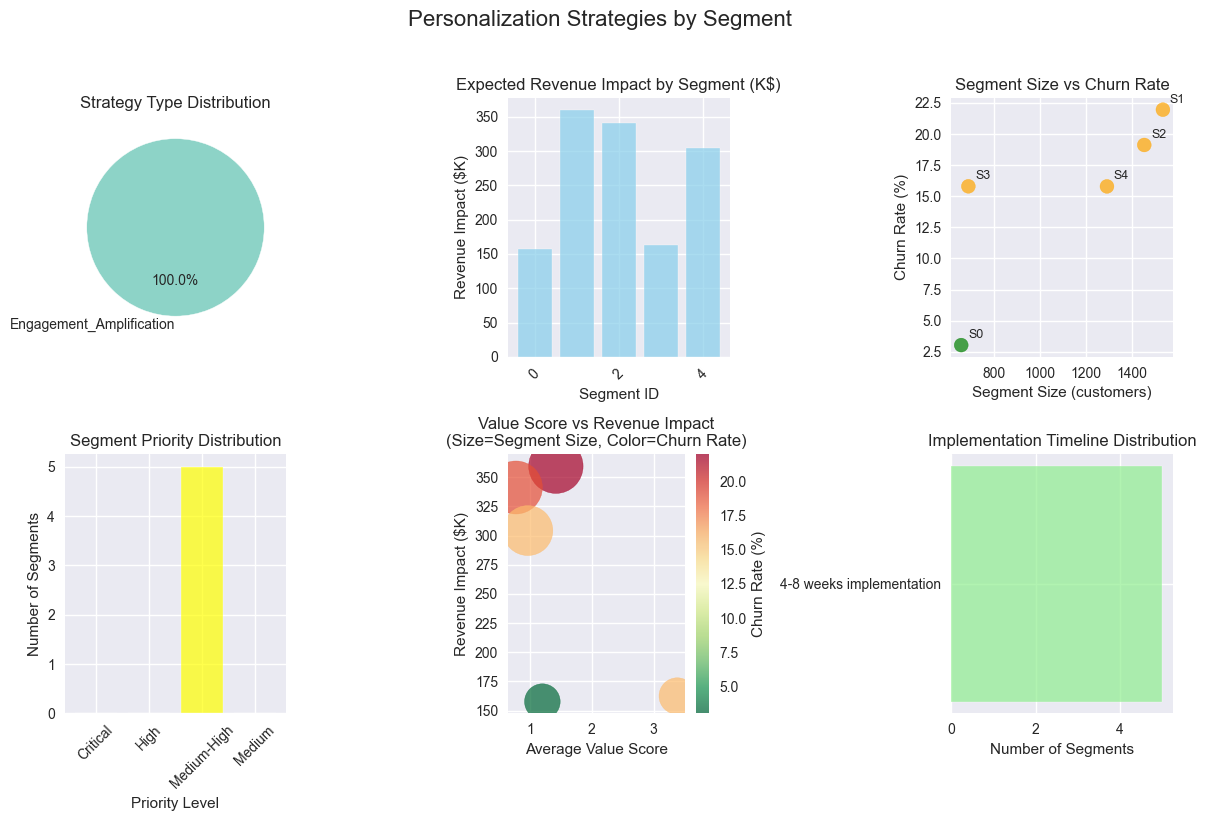

In [35]:
strategy_summary = personalization_engine.get_strategy_summary()
print("PERSONALIZATION STRATEGY SUMMARY:")
display(strategy_summary)

# Visualize strategies
fig = personalization_engine.plot_strategy_overview(figsize=(12, 8))
plt.suptitle('Personalization Strategies by Segment', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

Step 6: Business Impact Analysis

In [36]:
# Initialize business impact calculator
impact_calculator = BusinessImpactCalculator(avg_customer_value=1200, implementation_cost=225000)

#Calculate Business Impact
business_impact = impact_calculator.calculate_comprehensive_impact(segmented_data, strategies)

# Create reports directory
os.makedirs('reports', exist_ok=True)

# Save business impact analysis
impact_calculator.save_analysis('reports/business_impact_analysis.json')

print("Business impact analysis completed!")
print(f"Total Revenue Impact: ${business_impact['total_revenue_impact']:,.0f}")
print(f"ROI: {business_impact['roi_percentage']:.0f}%")
print("Analysis saved to: reports/business_impact_analysis.json")


💰 CALCULATING COMPREHENSIVE BUSINESS IMPACT
📊 Baseline Metrics:
   Total Customers: 5,630
   Current Churn Rate: 16.8%
   Average Customer Value: $1,200

🎯 Calculating segment-specific impacts:
   Segment 0 (Engagement_Amplification):
     💰 Revenue Impact: $181,526
     👥 Customers Retained: 4
     📈 Segment ROI: 1317.0%
   Segment 1 (Engagement_Amplification):
     💰 Revenue Impact: $436,190
     👥 Customers Retained: 67
     📈 Segment ROI: 1447.7%
   Segment 2 (Engagement_Amplification):
     💰 Revenue Impact: $410,876
     👥 Customers Retained: 55
     📈 Segment ROI: 1439.1%
   Segment 3 (Engagement_Amplification):
     💰 Revenue Impact: $193,140
     👥 Customers Retained: 21
     📈 Segment ROI: 1339.9%
   Segment 4 (Engagement_Amplification):
     💰 Revenue Impact: $362,648
     👥 Customers Retained: 40
     📈 Segment ROI: 1428.8%

📊 Performing scenario analysis:
   Conservative: ROI 159%, Payback 4.6 months
   Optimistic: ROI 681%, Payback 1.5 months
   Realistic: ROI 380%, Payb

Display detailed business impact metrics

BUSINESS IMPACT SUMMARY:


,Metric,Value
0,Total Customers,"5,630"
1,Current Churn Rate,16.8%
2,New Churn Rate,13.5%
3,Customers Retained,187
4,Total Revenue Impact,"$1,584,380"
5,Implementation Cost,"$87,353"
6,Annual Operational Cost,"$242,471"
7,Net Annual Benefit,"$1,254,556"
8,ROI Percentage,380.4%
9,Payback Period (months),2.5


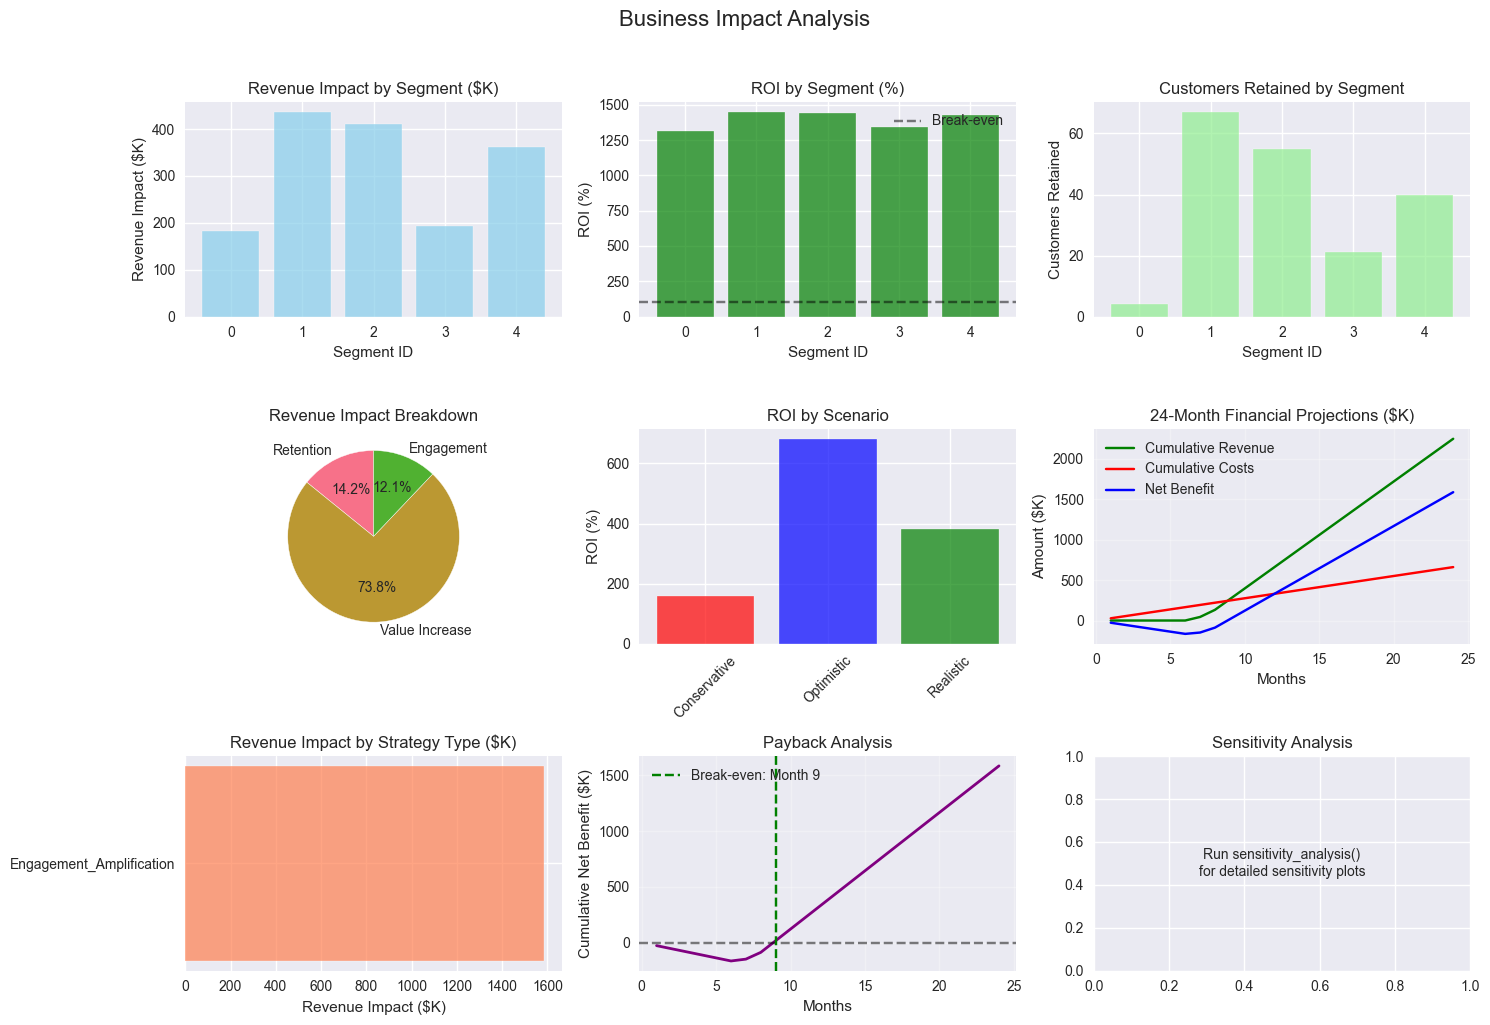

In [37]:
impact_summary = impact_calculator.get_impact_summary()
print("BUSINESS IMPACT SUMMARY:")
display(impact_summary)

# Visualize business impact
fig = impact_calculator.plot_impact_analysis(figsize=(15, 10))
plt.suptitle('Business Impact Analysis', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

Step 7: Sample Customer Recommendations

In [38]:
# Generate sample recommendations for each segment
sample_recommendations = personalization_engine.generate_sample_recommendations(segmented_data, churn_predictor, n_samples_per_segment=2)

# Create recommendations directory
os.makedirs('recommendations', exist_ok=True)

# Save recommendations
with open('recommendations/sample_customer_recommendations.json', 'w') as f:
    json.dump(sample_recommendations, f, indent=2, default=str)

print("Sample recommendations generated!")
print(f"{len(sample_recommendations)} customer recommendations created")
print("Saved to: recommendations/sample_customer_recommendations.json")

Sample recommendations generated!
10 customer recommendations created
Saved to: recommendations/sample_customer_recommendations.json


Display sample recommendations

In [39]:
print("SAMPLE CUSTOMER RECOMMENDATIONS:")
for i, rec in enumerate(sample_recommendations[:5]):
    print(f"Customer {rec['customer_id']} (Segment {rec['segment']}):")
    print(f"Risk Level: {rec['risk_level']} ({rec['churn_probability']:.2%})")
    print(f"Strategy: {rec['strategy_type']}")
    print("Top Actions:")
    for j, action in enumerate(rec['personalization_actions'][:3], 1):
        print(f"     {j}: {action}")

SAMPLE CUSTOMER RECOMMENDATIONS:
Customer 55301 (Segment 0):
Risk Level: Low Risk (1.50%)
Strategy: Engagement_Amplification
Top Actions:
     1: 📈 Implement upselling strategies with relevant premium options
     2: 🔄 Cross-sell complementary products from other categories
     3: 🔍 Enable advanced product discovery features
Customer 53588 (Segment 0):
Risk Level: Low Risk (1.50%)
Strategy: Engagement_Amplification
Top Actions:
     1: 💻 Highlight productivity tools and business solutions
     2: 📊 Offer professional-grade equipment and bulk discounts
     3: 🏢 Provide enterprise solutions and dedicated support
Customer 54844 (Segment 1):
Risk Level: High Risk (99.00%)
Strategy: Engagement_Amplification
Top Actions:
     1: 🚨 URGENT: Trigger immediate retention campaign within 24 hours
     2: 📞 Assign to customer success team for personal outreach
     3: 💰 Send personalized discount offer (15-20% off next purchase)
Customer 50976 (Segment 1):
Risk Level: Low Risk (0.00%)
Strategy: E

Step 8: Comprehensive Visualizations

📈 Creating comprehensive visualization suite...
   📊 Creating data exploration visualizations...
   👥 Creating segmentation visualizations...


KeyError: 'top_categories'

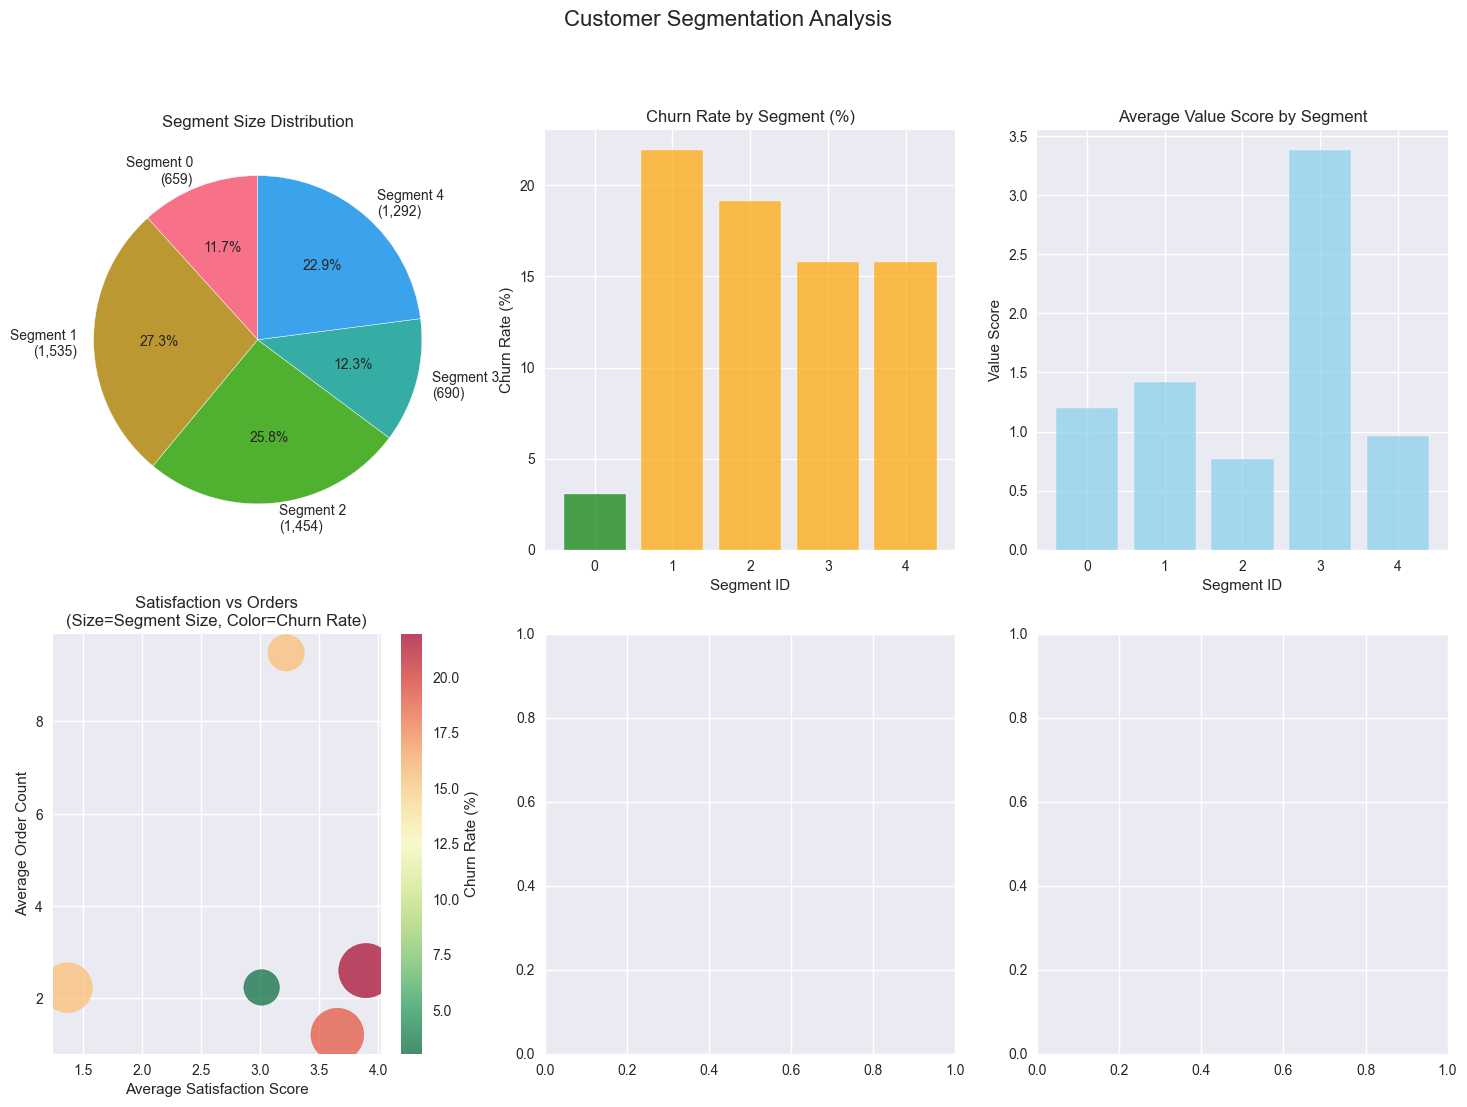

In [40]:
# Create comprehensive visualization suite
viz_results = create_comprehensive_visualizations(
    raw_data=raw_data,
    processed_data=segmented_data,
    segmentation_model=segmentation,
    churn_model=churn_predictor,
    business_impact=business_impact,
    strategies=strategies)

print("Comprehensive visualizations created!")
print(f"{len(viz_results)} visualization files saved in 'visualizations/' directory")

Step 9: Save Final Results

In [41]:
# Create data/processed directory
os.makedirs('data/processed', exist_ok=True)

# Save processed dataset
segmented_data.to_csv('data/processed/dohtem_processed_with_segments.csv', index=False)
print("Processed dataset saved: data/processed/dohtem_processed_with_segments.csv")

# Create comprehensive summary report
summary_report = {
    'analysis_date': datetime.now().isoformat(),
    'dataset_info': {
    'total_customers': len(segmented_data),
    'churn_rate': segmented_data['Churn'].mean(),
    'features_count': len(segmented_data.columns)
    },
    'model_performance': {
    'churn_model_auc': churn_model_results['test_auc'],
    'segments_identified': segmentation.n_clusters
    },
    'business_impact': business_impact,
    'key_insights': [
    "Counter-intuitive finding: Higher satisfaction scores correlate with higher churn rates",
    "Mobile/Mobile Phone categories show highest churn risk (27%+)",
    "Grocery customers demonstrate excellent retention (4.9% churn)",
    f"{business_impact.get('total_customers_retained', 0):,} high-value, high-risk customers identified as priority segment",
    f"Expected ROI of {business_impact.get('roi_percentage', 0):.0f}% in Year 1 with ${business_impact.get('total_revenue_impact', 0):,.0f} revenue impact"
    ],
    }

# Save summary report
with open('reports/dohtem_analysis_summary.json', 'w') as f:
    json.dump(summary_report, f, indent=2, default=str)
print("Summary report saved: reports/dohtem_analysis_summary.json")

Processed dataset saved: data/processed/dohtem_processed_with_segments.csv
Summary report saved: reports/dohtem_analysis_summary.json
